<a href="https://colab.research.google.com/github/maverick98/Group4Capstone/blob/main/decoder_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [1]:
import numpy as np
import string
import tensorflow as tf
from tensorflow import math, matmul, reshape, shape, transpose, cast, float32
from tensorflow.data import Dataset
from tensorflow.keras.layers import Embedding,Dense, Layer,TextVectorization
from tensorflow.keras.backend import softmax
from pickle import load, dump, HIGHEST_PROTOCOL
from sklearn.utils import shuffle
from numpy import savetxt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import convert_to_tensor, int64
from tensorflow.keras.layers import LayerNormalization,   ReLU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import LearningRateSchedule
from tensorflow.keras.metrics import Mean
from tensorflow import data, train,  reduce_sum,  equal, argmax,GradientTape, function
from tensorflow.keras.losses import sparse_categorical_crossentropy
from time import time
from pickle import dump
from tensorflow import    linalg, ones, maximum, newaxis
from tensorflow.keras import Model
from pickle import load
from tensorflow import Module
from tensorflow import   TensorArray, argmax,  transpose
from matplotlib.pylab import plt
from numpy import arange

from keras.utils import to_categorical
import numpy as np
from numpy import array
import pandas as pd
import cv2
from glob import glob
import PIL
import time
from tqdm import tqdm
import os
#import gensim
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import sentence_bleu
from PIL import Image
from numpy import random
from importlib.machinery import SourceFileLoader
from os.path import join
from google.colab import drive

# Check if connected to GPU

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


# Mount Google Drive

In [3]:


ROOT = "/content/drive"
drive.mount(ROOT,force_remount=True)




Mounted at /content/drive


In [4]:
PROJ = "MyDrive/Capstone/src" 
PROJECT_PATH = join(ROOT, PROJ)
print("PROJECT_PATH from your Google Drive is ",PROJECT_PATH)
!rm -rf "{PROJECT_PATH}"
!mkdir  "{PROJECT_PATH}"

PROJECT_PATH from your Google Drive is  /content/drive/MyDrive/Capstone/src


# Clone the code from https://sourceforge.net/projects/group4capstone/

In [5]:
%cd "{PROJECT_PATH}"
!pwd
MY_USER_NAME = 'msahu98' # This is your sourceforge.net username
!git clone https://{MY_USER_NAME}@git.code.sf.net/p/group4capstone/code group4capstone-code

/content/drive/MyDrive/Capstone/src
/content/drive/MyDrive/Capstone/src
Cloning into 'group4capstone-code'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 61 (delta 32), reused 0 (delta 0)
Unpacking objects: 100% (61/61), 7.79 KiB | 11.00 KiB/s, done.


# Load Modules

In [6]:
PROJECT_PATH 
#/content/drive/MyDrive/Capstone/src/group4capstone-code/src/positional_encoding.py

'/content/drive/MyDrive/Capstone/src'

In [7]:
def load_module(module_name):
    module_py=module_name+'.py'
    SourceFileLoader(module_name, join(join(PROJECT_PATH,'group4capstone-code/src'), module_py)).load_module()



In [8]:
load_module('positional_encoding')
load_module('multihead_attention')
load_module('add_normalization')
load_module('feedforward')
load_module('decoder')

# Transformer Architecture


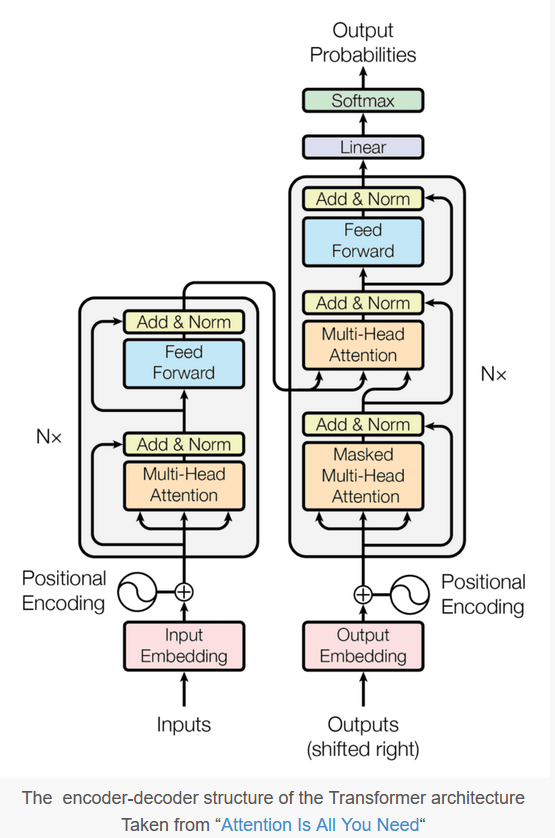

# Testing Decoder

In [9]:
from decoder import Decoder

In [10]:
dec_vocab_size=20
input_sequence_length=5
h=8
d_k=64
d_v=64
d_ff=2048
d_model=512
num_layers=6

batch_size=64
dropout_rate=0.1

input_seq=random.random((batch_size,input_sequence_length))
enc_output=random.random((batch_size,input_sequence_length,d_model))

decoder=Decoder(dec_vocab_size,input_sequence_length,h,d_k,d_v,d_model,d_ff,num_layers,dropout_rate)

print(decoder(input_seq, enc_output,None,True))


tf.Tensor(
[[[-1.6725487e+00  4.2835164e-01  6.8433046e-01 ...  1.0110794e+00
    1.4899904e+00  2.2389033e+00]
  [-1.6318620e+00  3.4883842e-01  7.7593404e-01 ...  9.9546766e-01
    1.5036646e+00  2.2906370e+00]
  [-1.6475395e+00  2.2302242e-01  7.9770255e-01 ...  1.0053160e+00
    1.4765462e+00  2.2960725e+00]
  [-1.7049149e+00  1.9181184e-01  7.3014879e-01 ...  1.0572735e+00
    1.4151161e+00  2.2372782e+00]
  [-1.7425153e+00  3.0427298e-01  6.3855618e-01 ...  1.1307786e+00
    1.3286707e+00  2.1677904e+00]]

 [[-1.5210118e+00  3.8579693e-01  8.8429280e-02 ...  1.0655396e+00
    1.6381071e+00  2.4724517e+00]
  [-1.4777883e+00  3.1207231e-01  1.6941440e-01 ...  1.0586416e+00
    1.6618248e+00  2.5049310e+00]
  [-1.4845217e+00  1.8337481e-01  1.9487658e-01 ...  1.0750587e+00
    1.6390582e+00  2.4975567e+00]
  [-1.5360259e+00  1.2964581e-01  1.3704574e-01 ...  1.1277531e+00
    1.5893767e+00  2.4491653e+00]
  [-1.5751227e+00  2.1229321e-01  5.5419981e-02 ...  1.2029157e+00
    1.52300

# Visualization of DecoderLayer

In [11]:
from decoder import DecoderLayer
decoder_layer=DecoderLayer(input_sequence_length,h,d_k,d_v,d_model,d_ff,dropout_rate)
decoder_layer.build_graph().summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 512)]     0           []                               
                                                                                                  
 multi_head_attention_12 (Multi  (None, 5, 512)      131776      ['input_1[0][0]',                
 HeadAttention)                                                   'input_1[0][0]',                
                                                                  'input_1[0][0]']                
                                                                                                  
 dropout_19 (Dropout)           (None, 5, 512)       0           ['multi_head_attention_12[0][0]']
                                                                                              